**Vehicle Emissions Analysis**

Introduction:

This project analyzes vehicle emissions data to identify key factors that contribute to emissions. The goal is to understand the impact of various vehicle features, such as engine size, fuel type, and efficiency, on emissions, and to use these insights for emissions prediction.

Problem Statement:

With rising concerns over air quality and environmental health, understanding and predicting vehicle emissions based on various vehicle features has become crucial. This project aims to analyze how specific vehicle characteristics—such as engine size, fuel type, weight, and efficiency ratings—affect emission levels. By building predictive models on vehicle feature data, this study seeks to provide insights into which features contribute the most to emissions and offer actionable knowledge for automakers, policymakers, and consumers to make environmentally friendly decisions.

Dataset Description:

The dataset includes vehicle attributes such as engine size, number of cylinders, fuel consumption, and emissions. The data has been preprocessed and cleaned for analysis.

**Loading the Data Set and Displaying its Description**

In [1]:
#overview of important libraries used in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#loading the dataset from the csv file we selected
data = pd.read_csv('/content/Fuel_Consumption_2000-2022.csv')


#displaying the first few rows of data
print(data.head(5))

#stating the important description of the data
data.info()
data.describe()


   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198  
<c

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


**PART 2-DATA WRANGLING, PREPROCESSING AND TRANSFORMATION**

## Data Cleaning

Data cleaning is a critical step to ensure the dataset is accurate, complete, and ready for analysis. In this project, data cleaning involves handling any issues with the data, such as missing values, inconsistent data types, duplicates and outlier detection and handling.

### 1. Handling Missing Values
   - **Purpose**: To ensure there are no gaps in the data that could lead to inaccuracies in analysis and modeling.
   - **Method**: Missing values are handled by either filling them with appropriate values (like mean or median for numerical columns) or removing rows if the missing data is significant and cannot be accurately filled.

### 2. Removing Duplicates
   - **Purpose**: To avoid redundant data, which can skew the results by giving extra weight to repeated observations.
   - **Method**: Duplicate rows are identified and removed based on unique variables.
   - **Outcome**: Provides a clean dataset where each row represents a unique observation.

### 3. Outlier Detection and Treatment
   - **Purpose**: To identify values which are usually out of range in numerical variables, which might distort the analysis.
   - **Method**: Outliers are detected using statistical methods like z-scores or interquartile ranges (IQR), we have used IQR method in our project
   - **Outcome**: Helps in maintaining data quality by ensuring that extreme values don’t skew results.


In [2]:

#Checking for missing data values in the dataset:
missing_data = data.isnull().sum()
missing_columns = missing_data[missing_data > 0]

#Having a check-if there are missing cols then fill the data data
if not missing_columns.empty:
    print("Columns with missing values and their counts:")
    print(missing_columns)

    #here we are filling missing values based on data type i.e to check for numerical and categorical columns
    for column in missing_columns.index:
        if data[column].dtype in ['float64', 'int64']:
            data[column] = data[column].fillna(data[column].mean())
            print(f"Filled missing values in numerical column '{column}' with mean value.")
        elif data[column].dtype == 'object':  # Categorical columns
            data[column] = data[column].fillna(data[column].mode()[0])
            print(f"Filled missing values in categorical column '{column}' with mode value.")

    print("\nRows with missing values after filling (if any):")
    print(data[data.isnull().any(axis=1)])
else:
    print("No missing values found in the dataset. Proceeding with the next steps.")


#Checking of duplicate rows:
dup_count = data.duplicated().sum()
print(f'\nDuplicates in the dataset: {dup_count}')
if dup_count > 0:
    print("\nRows with duplicates:")
    print(data[data.duplicated(keep=False)].to_string())#keep=False used to show all duplicate rows, not just the first occurrence

#dropping duplicate rows
data_cleaned = data.drop_duplicates()
dup_after = data_cleaned.duplicated().sum()
print(f'\nDuplicates after removal: {dup_after}')


#Defining a function to identify and handle outliers by capping them within IQR bounds:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #displaying outliers before handling them
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers detected in '{column}':")
        print(outliers[[column]])
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        print(f"Outliers in '{column}' have been capped.\n")
    else:
        print(f"No outliers detected in '{column}'.")
numerical_columns = ['ENGINE SIZE', 'FUEL CONSUMPTION', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

#Applying to each column
for col in numerical_columns:
    cap_outliers(data_cleaned, col)

print("Outliers settled in our data set!!")


No missing values found in the dataset. Proceeding with the next steps.

Duplicates in the dataset: 1

Rows with duplicates:
     YEAR        MAKE                    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS
377  2000  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0          8           A4    Z              17.7            12.7             15.4          18        354
378  2000  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0          8           A4    Z              17.7            12.7             15.4          18        354

Duplicates after removal: 0
Outliers detected in 'ENGINE SIZE':
       ENGINE SIZE
207            8.0
208            8.0
867            8.0
868            8.0
1568           8.0
1569           8.0
2259           8.3
2306           8.3
3155           8.3
4099           8.3
4100           8.3
4104           8.3
5117           8.3
5118         

<ipython-input-2-0997ab6c3d62>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-2-0997ab6c3d62>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-2-0997ab6c3d62>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

### Data Transformation

### 1. Encoding Categorical Variables
   - **Purpose**: To convert categorical variables into a format suitable for analysis and modeling, as most machine learning algorithms work with numerical data.
   - **Method**:
     - **Label Encoding**: For ordinal data or binary categories.
     - **One-Hot Encoding**: For nominal categorical variables with multiple categories, such as Fuel Type and Transmission.
   - **Outcome**: Allows the model to interpret categorical variables accurately, ensuring that these variables contribute to the analysis effectively.
   *We have implemented label encoding on our data set.

### 2. Creating New Variables

   - **Purpose**: To add new features that provide additional information or combine existing features in a meaningful way.
   - **Method**: A new feature called Efficiency is created as a ratio of fuel consumption and engine size, providing a measure of how efficiently each vehicle uses fuel.
   - **Outcome**: The Efficiency variable adds another dimension to the analysis, offering insights into the relationship between vehicle specifications and emissions.


In [3]:
#Creating a new variable for our analysis by using existing variables from the data set
data_cleaned['Efficiency'] = data_cleaned['COMB (mpg)'] / data_cleaned['ENGINE SIZE']
from sklearn.preprocessing import LabelEncoder#library used
le = LabelEncoder()

#encoding the FUEL column
data_cleaned['FUEL_Encoded'] = le.fit_transform(data_cleaned['FUEL'])#new column created
print("Categorical variable 'FUEL' has been encoded.")

#encode the TRANSMISSION column
data_cleaned['TRANSMISSION_Encoded'] = le.fit_transform(data_cleaned['TRANSMISSION'])
print("Categorical variable 'TRANSMISSION' has been encoded.")

#saving the dataset with transformations-making a new file Fuel_Consumption_Cleaned.csv
data_cleaned.to_csv('Fuel_Consumption_Cleaned.csv', index=False)
print("Transformed dataset with 'Efficiency', encoded 'FUEL', and encoded 'TRANSMISSION' columns has been saved as 'Fuel_Consumption_Cleaned.csv'.")


<ipython-input-3-72eb9d5ac486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Efficiency'] = data_cleaned['COMB (mpg)'] / data_cleaned['ENGINE SIZE']
<ipython-input-3-72eb9d5ac486>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['FUEL_Encoded'] = le.fit_transform(data_cleaned['FUEL'])#new column created
<ipython-input-3-72eb9d5ac486>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Categorical variable 'FUEL' has been encoded.
Categorical variable 'TRANSMISSION' has been encoded.
Transformed dataset with 'Efficiency', encoded 'FUEL', and encoded 'TRANSMISSION' columns has been saved as 'Fuel_Consumption_Cleaned.csv'.


### Standardizing and Normalization

- **Purpose**: To bring numerical variables to a similar scale, which is often necessary for algorithms sensitive to the scale of data.
- **Method**:
  - **Normalization**: Applied to variables that need to be scaled between 0 and 1, if required for the analysis.
  - **Standardization**: Applied to variables where z-score scaling (centering to mean 0 and standard deviation 1) is needed, ensuring that larger values dont dominate the analysis.
- **Outcome**: Ensures that all variables contribute equally to the analysis and prevents bias caused by differing scales.


In our Data Set, we have performed standardization only as our features have values on different scales hence to make our data better for analysis and predictive modelling.

In [4]:
from sklearn.preprocessing import StandardScaler
#standardising the data using a built in standard scaler-also only standardising the numerical columns
numerical_columns = ['ENGINE SIZE', 'COMB (mpg)', 'COMB (L/100 km)', 'Efficiency','FUEL CONSUMPTION','HWY (L/100 km)']
scaler = StandardScaler()

data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])
data_cleaned.to_csv('Fuel_Consumption_Standardized.csv', index=False)

#saving standardised data into a new file(prediction and modelling to be done on this dataset)
print("Standardized dataset has been saved as 'Fuel_Consumption_Standardized.csv'.")


<ipython-input-4-0cc3682b5421>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


Standardized dataset has been saved as 'Fuel_Consumption_Standardized.csv'.


**PART 3-EXPLORATORY DATA ANALYSIS**

## Exploratory Data Analysis (EDA)

### Univariate Analysis

Univariate analysis involves examining each variable individually to understand its distribution, central tendency, and spread. This part of the analysis helps in identifying the general characteristics of each feature without considering their relationships with other variables.

**Purpose**:
- **Distribution**: To see how each variable is distributed across its range, which can indicate patterns, skewness, or presence of outliers.
- **Central Tendency**: Measures like the mean and median provide insights into typical values.
- **Variability**: Measures such as standard deviation and interquartile range show how spread out the values are.

**Methods**:
- **Summary Statistics**: Includes basic descriptive statistics like mean, median, minimum, maximum, and standard deviation for numerical variables.
- **Visualizations**:
  - **Histograms**: Show the frequency distribution of each numerical variable.
  - **Box Plots**: Provide a visual summary of data through quartiles, highlighting potential outliers.
  - **Bar Plots**: Used for categorical variables to show the count of each category.

This univariate analysis provides a strong understanding of each variable, setting the stage for deeper exploration in our analysis. We have used histograms,box-plots and bar plots to provide a visual summary of each variable.


Univariate Analysis for ENGINE SIZE
count    22555.000000
mean         3.354527
std          1.328725
min          0.800000
25%          2.300000
50%          3.000000
75%          4.200000
max          7.050000
Name: ENGINE SIZE, dtype: float64


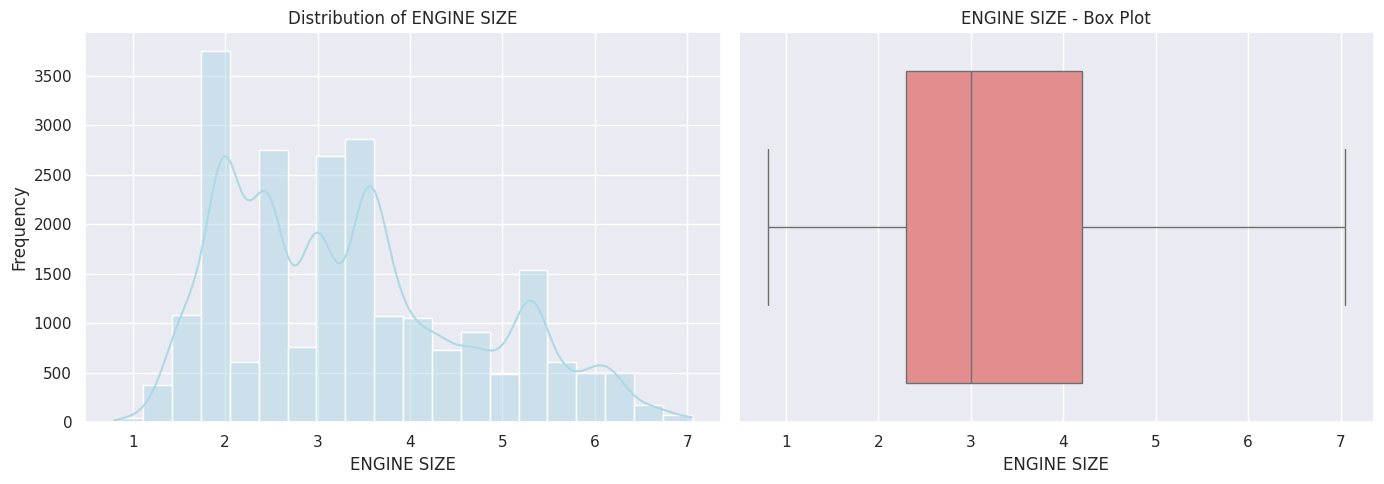


Univariate Analysis for CYLINDERS
count    22555.000000
mean         5.854046
std          1.819582
min          2.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         16.000000
Name: CYLINDERS, dtype: float64


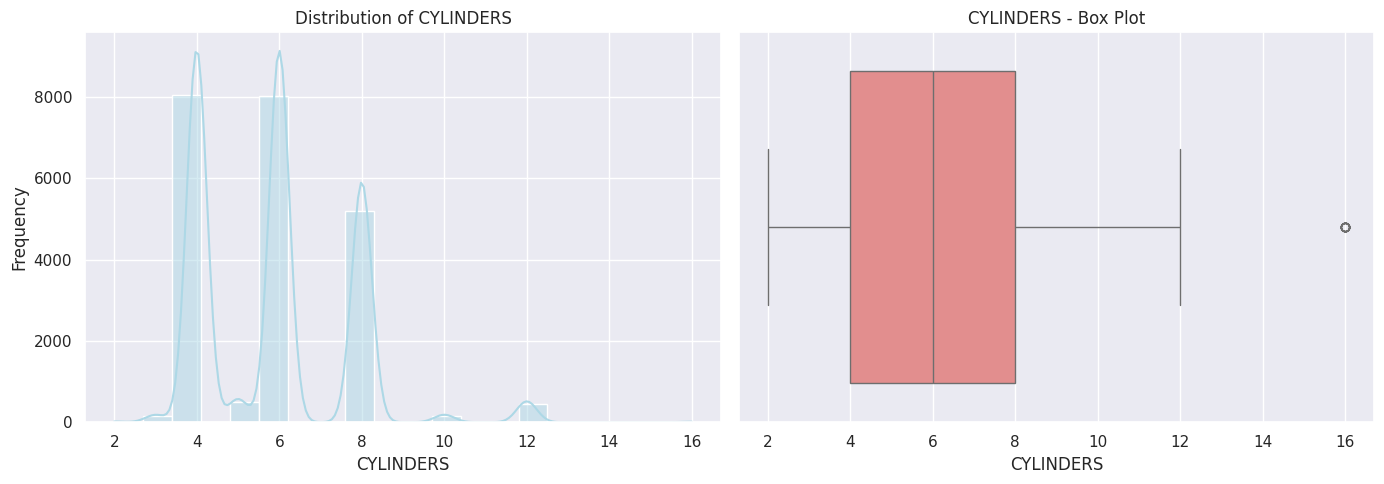


Univariate Analysis for COMB (L/100 km)
count    22555.000000
mean        10.992804
std          2.786338
min          3.700000
25%          9.100000
50%         10.600000
75%         12.700000
max         18.100000
Name: COMB (L/100 km), dtype: float64


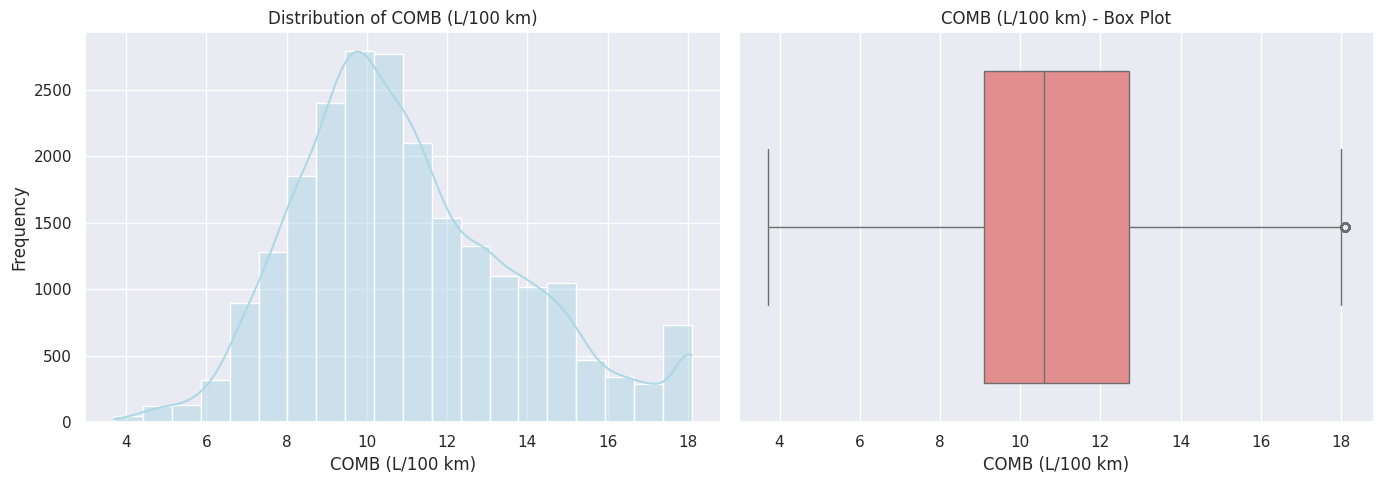


Univariate Analysis for EMISSIONS
count    22555.000000
mean       249.705476
std         58.126868
min         90.500000
25%        209.000000
50%        243.000000
75%        288.000000
max        406.500000
Name: EMISSIONS, dtype: float64


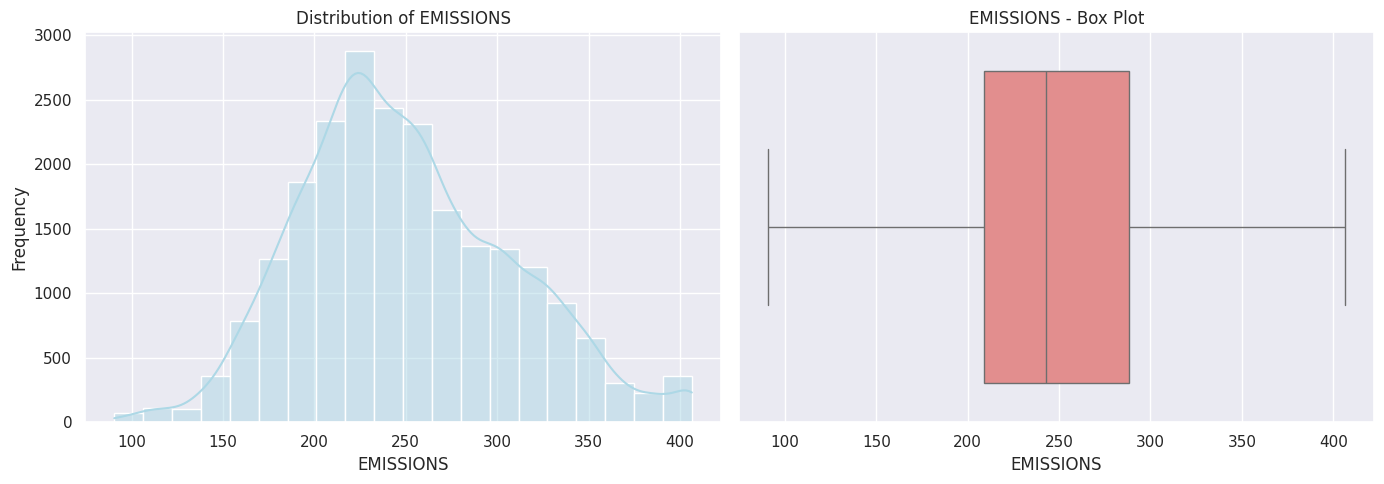


Univariate Analysis for Efficiency
count    22555.000000
mean        10.279715
std          6.471902
min          1.560284
25%          5.250000
50%          8.571429
75%         14.000000
max         55.625000
Name: Efficiency, dtype: float64


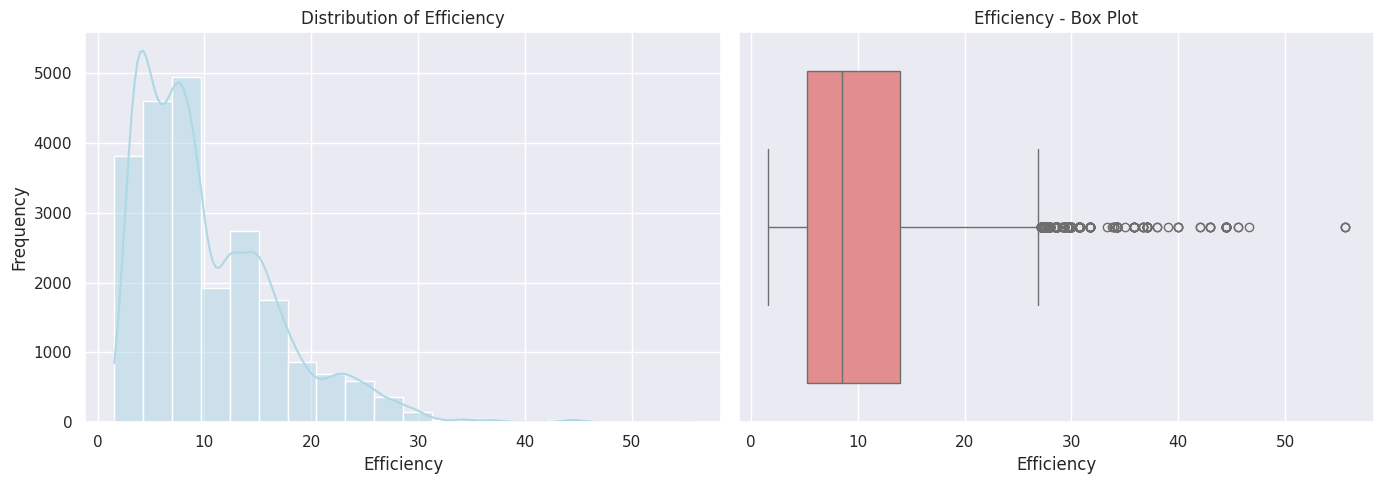


Univariate Analysis for FUEL_Encoded
count    22555.000000
mean         3.274795
std          0.808826
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: FUEL_Encoded, dtype: float64


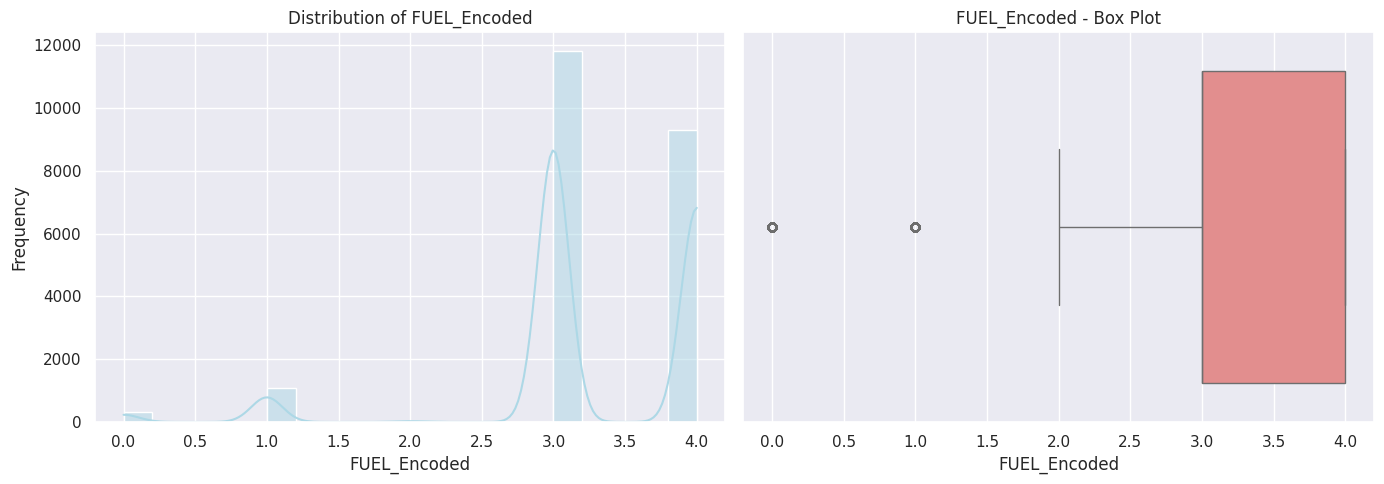


Univariate Analysis for TRANSMISSION_Encoded
count    22555.000000
mean        13.691776
std          9.503492
min          0.000000
25%          4.000000
50%         16.000000
75%         20.000000
max         29.000000
Name: TRANSMISSION_Encoded, dtype: float64


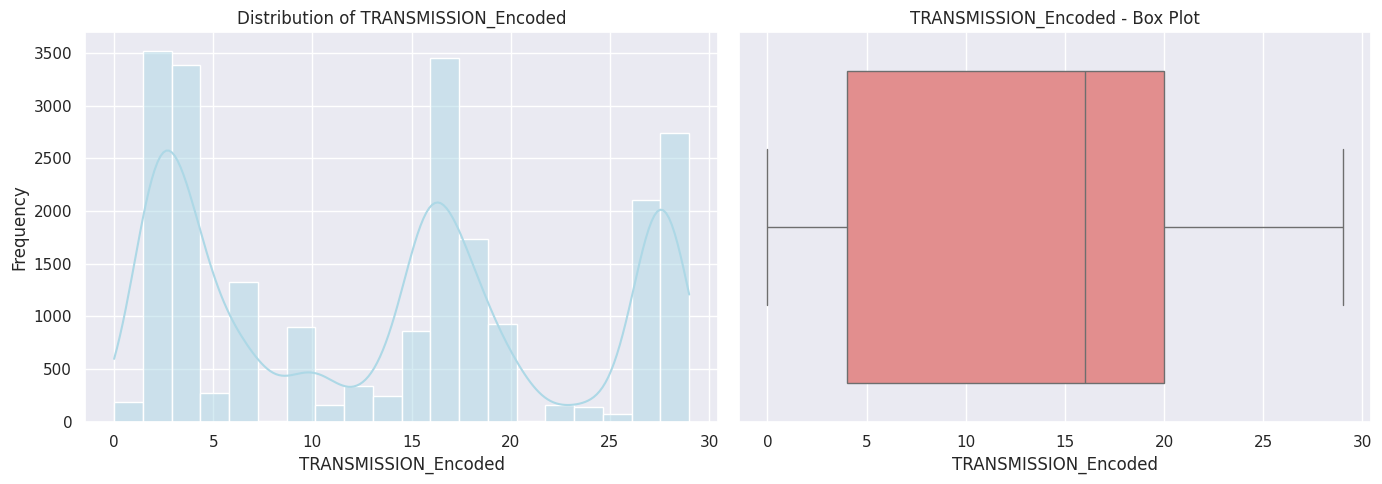


Univariate Analysis for YEAR
count    22555.000000
mean      2011.554955
std          6.297939
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2022.000000
Name: YEAR, dtype: float64


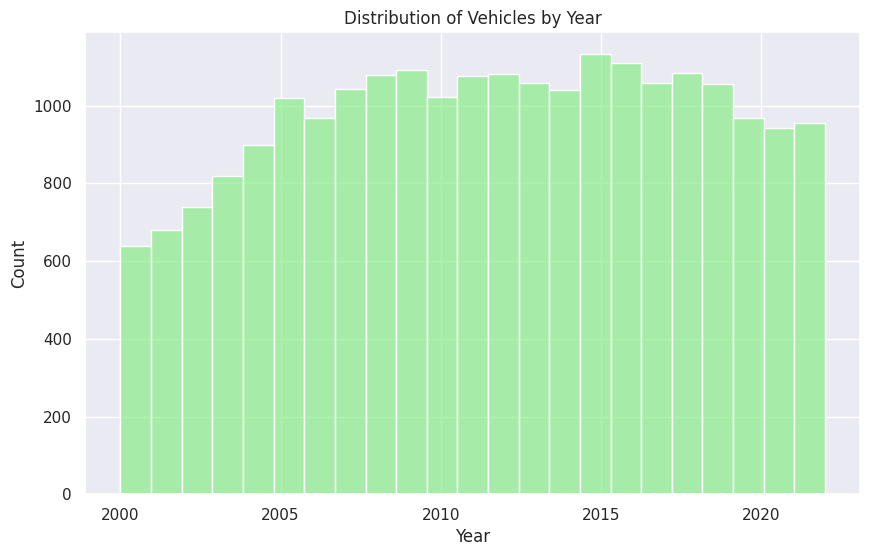


Univariate Analysis for VEHICLE CLASS
VEHICLE CLASS
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE

<ipython-input-8-177dd71f6784>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='VEHICLE CLASS', palette="viridis")


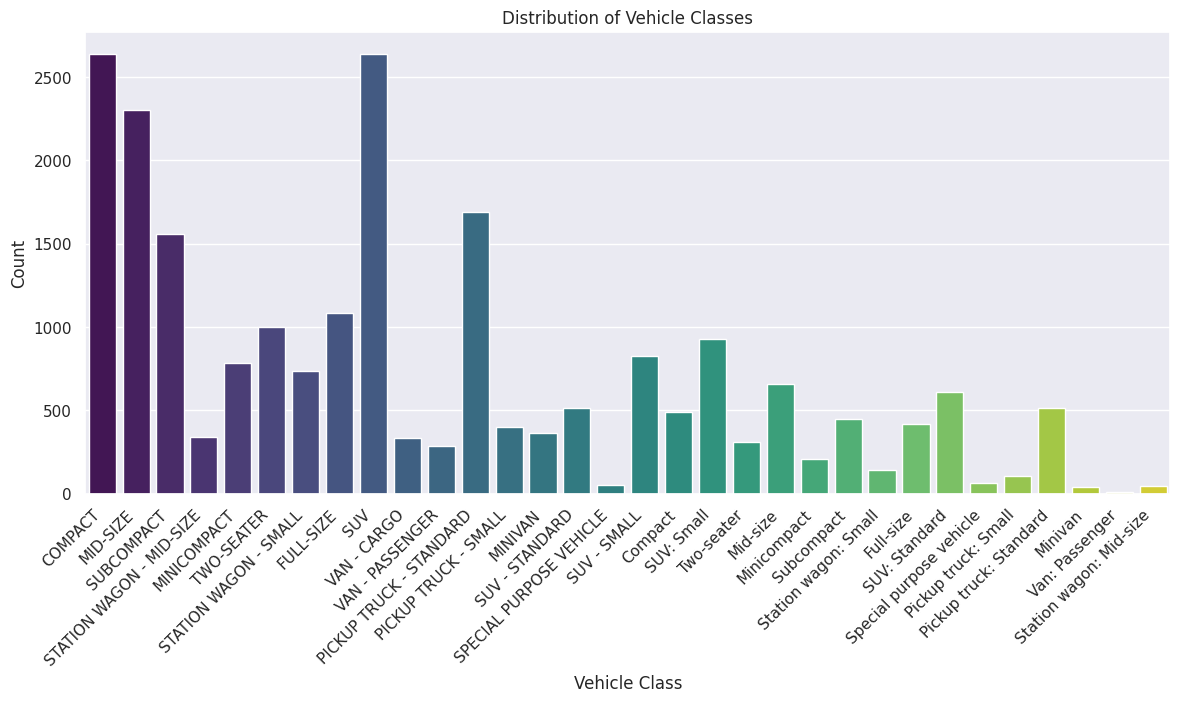


--- Univariate Analysis Insights ---
1. Vehicles with larger engine sizes and higher cylinder counts generally show higher emissions.
2. Efficiency shows a wide range, suggesting significant variability in fuel efficiency across different vehicles.
3. Fuel type and transmission type (encoded) can potentially impact emissions, as different fuel types and transmission configurations likely contribute differently to efficiency.
4. The distribution of vehicle classes provides insight into common vehicle types, with certain classes likely contributing more to emissions based on engine size and efficiency.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#using the cleaned data set rather than the standardized one as we need to display the summary such as count,mean,median etc
data = pd.read_csv('/content/Fuel_Consumption_Cleaned.csv')
sns.set(style="darkgrid")
plt.rcParams.update({'figure.figsize': (10, 6)})
variables = ['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'EMISSIONS', 'Efficiency', 'FUEL_Encoded', 'TRANSMISSION_Encoded']


for var in variables:
    #displaying summary statistics for each variable
    print(f"\nUnivariate Analysis for {var}")
    print(data[var].describe())

    #creating histograms with KDE and box plots for visualizing distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    #histogram with KDE (Kernel Density Estimate) for showing the distribution shape
    sns.histplot(data[var], bins=20, kde=True, ax=axes[0], color='lightblue')
    axes[0].set_title(f'Distribution of {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')

    #box plot for identifying central tendency, spread, and potential outliers
    sns.boxplot(x=data[var], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{var} - Box Plot')
    axes[1].set_xlabel(var)

    plt.tight_layout()
    plt.show()


# YEAR (distribution of vehicle data by year, if available)
if 'YEAR' in data.columns:
    print("\nUnivariate Analysis for YEAR")
    print(data['YEAR'].describe())
    plt.figure(figsize=(10, 6))
    sns.histplot(data['YEAR'], bins=len(data['YEAR'].unique()), kde=False, color='lightgreen')
    plt.title('Distribution of Vehicles by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()

# VEHICLE CLASS (distribution of vehicles by class type)
if 'VEHICLE CLASS' in data.columns:
    print("\nUnivariate Analysis for VEHICLE CLASS")
    print(data['VEHICLE CLASS'].value_counts())

    # Plotting distribution of vehicle classes
    plt.figure(figsize=(14, 6))  # Increased width for better label spacing
    sns.countplot(data=data, x='VEHICLE CLASS', palette="viridis")
    plt.title('Distribution of Vehicle Classes')
    plt.xlabel('Vehicle Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align to right to prevent overlap
    plt.show()

#insights based on univariate analysis
print("\n--- Univariate Analysis Insights ---")
print("1. Vehicles with larger engine sizes and higher cylinder counts generally show higher emissions.")
print("2. Efficiency shows a wide range, suggesting significant variability in fuel efficiency across different vehicles.")
print("3. Fuel type and transmission type (encoded) can potentially impact emissions, as different fuel types and transmission configurations likely contribute differently to efficiency.")
print("4. The distribution of vehicle classes provides insight into common vehicle types, with certain classes likely contributing more to emissions based on engine size and efficiency.")


### Bivariate Analysis

Bivariate analysis examines the relationships between pairs of variables to identify dependencies, correlations, or patterns. In the context of this project, bivariate analysis is essential for understanding how each feature (such as engine size, fuel type, or efficiency) relates to emissions.

**Purpose**:
- **Identify Relationships**: To see if there is a measurable connection between variables, particularly between emissions and potential predictor variables.
- **Understand Correlations**: Quantifying correlations between numerical variables helps determine if increases or decreases in one variable correspond to similar changes in another.
- **Assess Categorical Impact**: Examining how categorical variables, like fuel type or transmission type, affect continuous variables like emissions provides insights into group-based differences.

**Methods**:
- **Scatter Plots**: Used for continuous variables to visualize potential linear or non-linear relationships. For example, plotting engine size against emissions shows if larger engines tend to emit more.
- **Correlation Matrix and Heatmap**: This quantifies the strength and direction of relationships between numerical variables. A heatmap visually represents these correlations, making it easier to spot strong positive or negative relationships.
- **Box Plots**: Useful for exploring the relationship between categorical variables (such as number of cylinders or transmission type) and a continuous variable (like emissions). Box plots reveal the spread and central tendency of emissions within each category.

This analysis will help in identifying the most relevant features for predicting emissions, which is essential for building an effective predictive model.


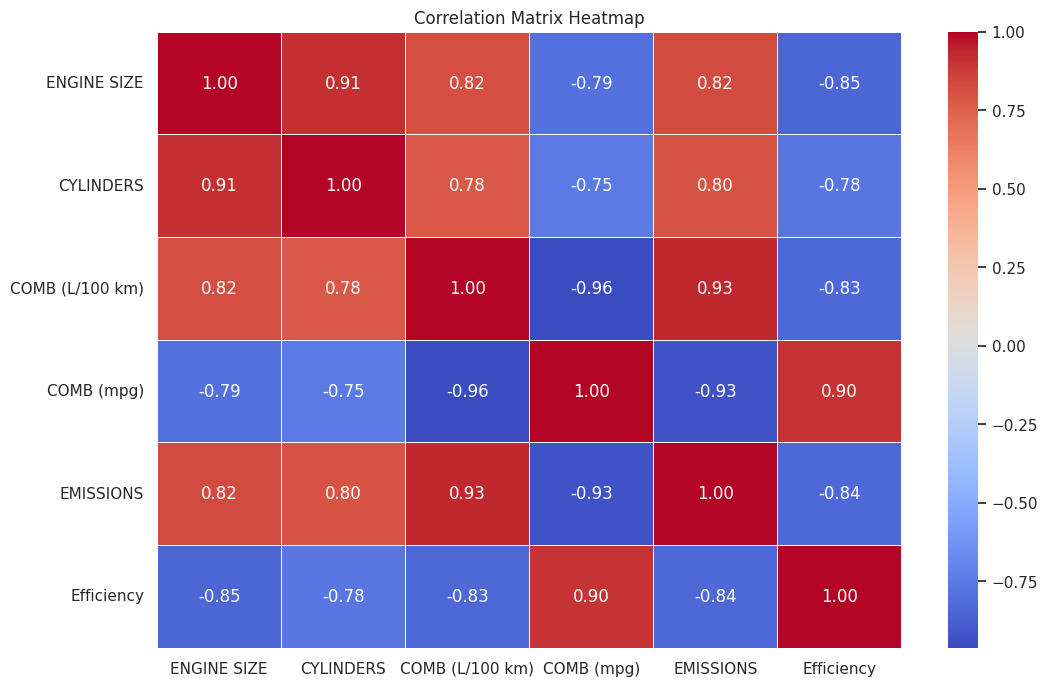

Insight: The correlation matrix helps identify which variables are strongly correlated with emissions. Variables with high correlation values with emissions are likely to be useful for prediction.


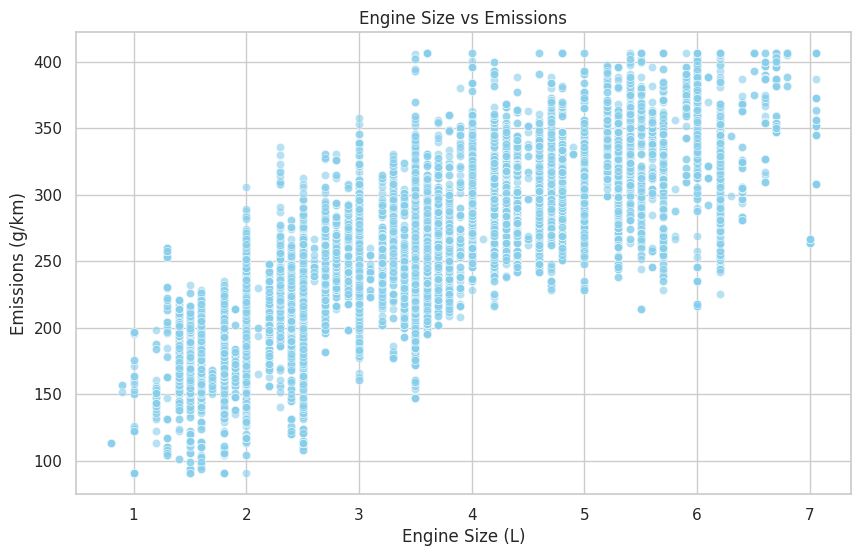

Insight: Larger engine sizes appear to correlate with higher emissions, indicating that engine size is an important predictor for emissions.


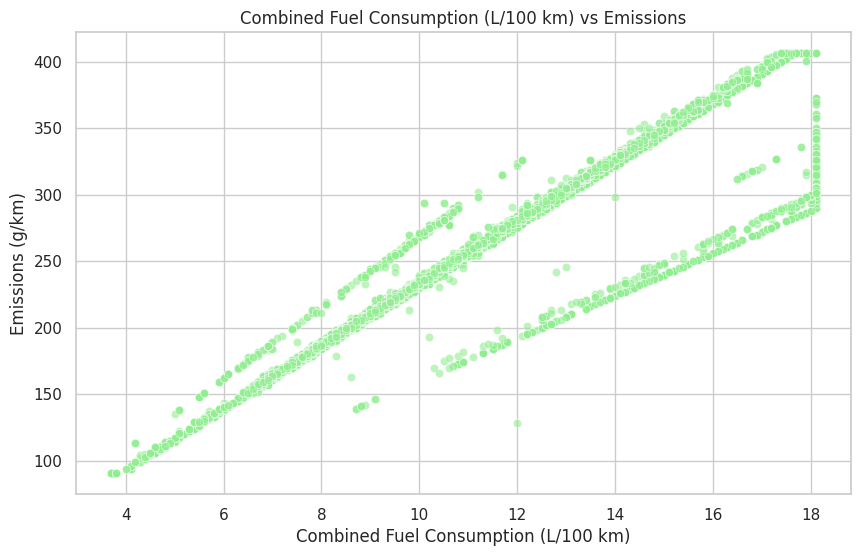

Insight: As combined fuel consumption increases, emissions also tend to increase, reinforcing that fuel consumption is a strong predictor of emissions.


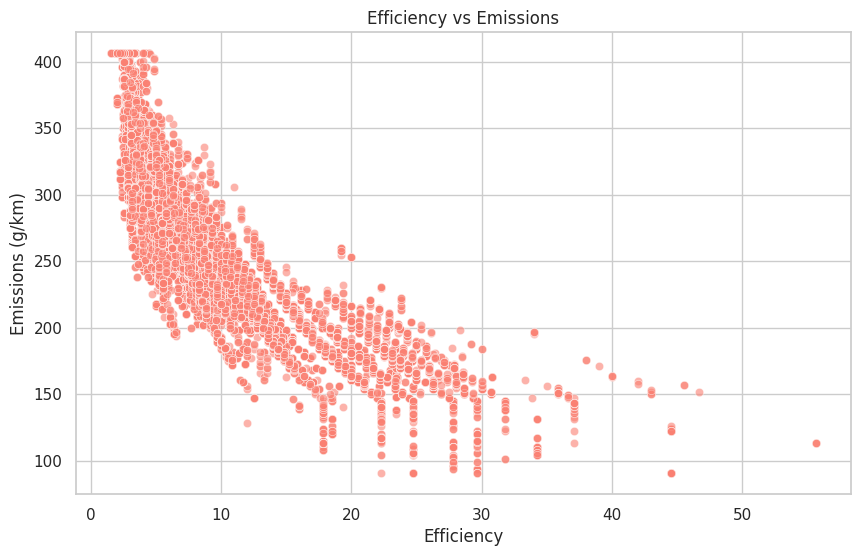

Insight: Higher efficiency generally correlates with lower emissions, indicating that efficiency is inversely related to emissions and could serve as a key predictive feature.


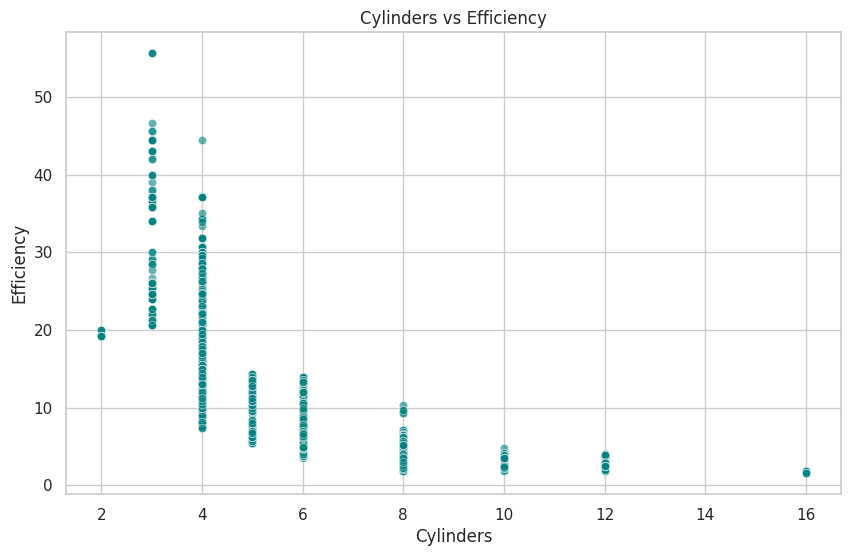

Insight: Engines with more cylinders often have lower efficiency, which could indirectly contribute to higher emissions.


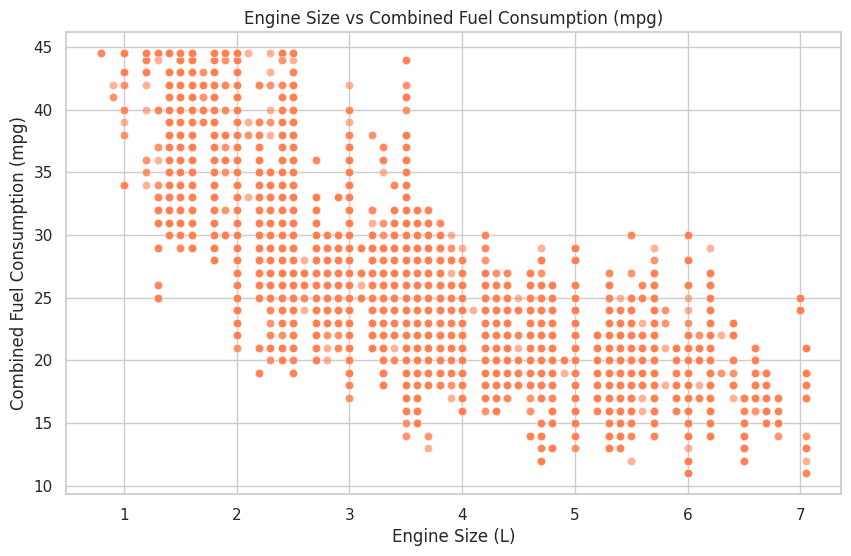

Insight: Larger engines tend to have lower miles per gallon, indicating reduced efficiency, which could lead to higher emissions.


<ipython-input-9-15b791dfe1bc>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='CYLINDERS', y='EMISSIONS', palette='Set2')


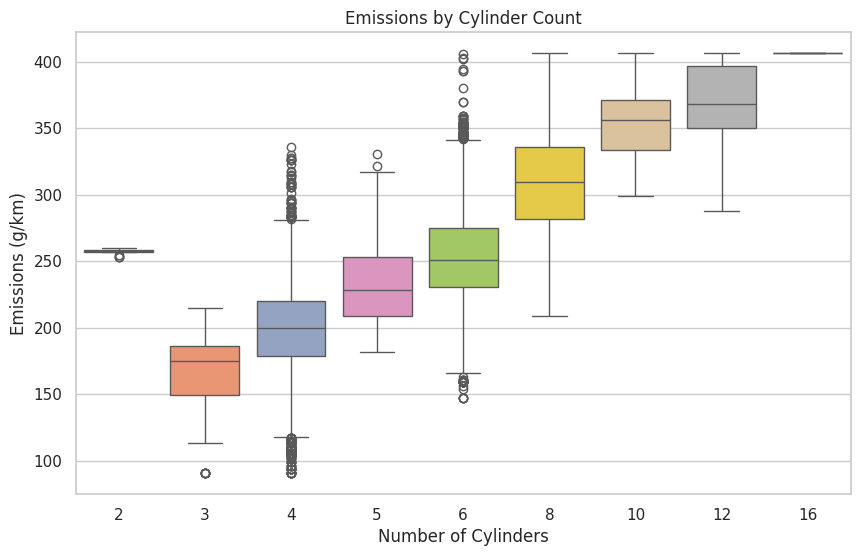

Insight: Vehicles with more cylinders tend to have higher emissions, showing that cylinder count is a significant feature when predicting emissions.


<ipython-input-9-15b791dfe1bc>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='TRANSMISSION_Encoded', y='EMISSIONS', palette='Set3')


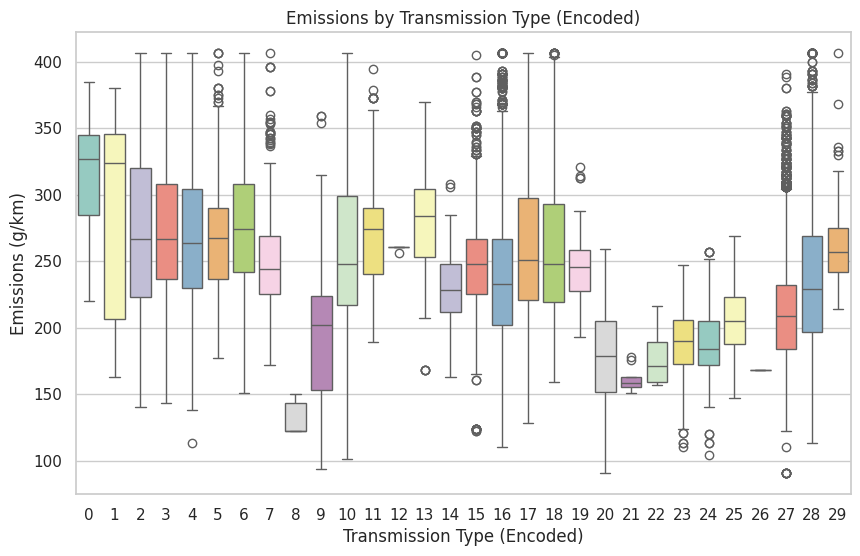

Insight: Transmission type shows some variation in emissions, suggesting that transmission could be another feature to consider in the model.

--- Summary of Bivariate Analysis Insights ---

1. Larger engine sizes, higher cylinder counts, and higher fuel consumption are directly related to higher emissions, making them essential predictors.
2. Efficiency is inversely related to emissions, as vehicles with higher efficiency tend to produce lower emissions.
3. The correlation matrix highlights strong relationships, confirming that engine size, fuel consumption, and efficiency are key features for emissions prediction.
4. Transmission type also shows some variation in emissions, suggesting that it may add value as a feature in the predictive model.
5. Emissions have generally decreased over recent years, likely due to advancements in technology and regulatory impacts on vehicle emissions.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Fuel_Consumption_Cleaned.csv')
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 6)})


# 1.Correlation Matrix and Heatmap with Key Variables
plt.figure(figsize=(12, 8))
correlation_matrix = data[['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS', 'Efficiency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
print("Insight: The correlation matrix helps identify which variables are strongly correlated with emissions. Variables with high correlation values with emissions are likely to be useful for prediction.")

# 2. Scatter Plots for Key Variable Pairs with Emissions

# Engine Size vs Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ENGINE SIZE', y='EMISSIONS', alpha=0.6, color='skyblue')
plt.title('Engine Size vs Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('Emissions (g/km)')
plt.show()
print("Insight: Larger engine sizes appear to correlate with higher emissions, indicating that engine size is an important predictor for emissions.")

# Combined Fuel Consumption (L/100 km) vs Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='COMB (L/100 km)', y='EMISSIONS', alpha=0.6, color='lightgreen')
plt.title('Combined Fuel Consumption (L/100 km) vs Emissions')
plt.xlabel('Combined Fuel Consumption (L/100 km)')
plt.ylabel('Emissions (g/km)')
plt.show()
print("Insight: As combined fuel consumption increases, emissions also tend to increase, reinforcing that fuel consumption is a strong predictor of emissions.")

# Efficiency vs Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Efficiency', y='EMISSIONS', alpha=0.6, color='salmon')
plt.title('Efficiency vs Emissions')
plt.xlabel('Efficiency')
plt.ylabel('Emissions (g/km)')
plt.show()
print("Insight: Higher efficiency generally correlates with lower emissions, indicating that efficiency is inversely related to emissions and could serve as a key predictive feature.")

# Scatter Plot: Cylinders vs Efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CYLINDERS', y='Efficiency', alpha=0.6, color='teal')
plt.title('Cylinders vs Efficiency')
plt.xlabel('Cylinders')
plt.ylabel('Efficiency')
plt.show()
print("Insight: Engines with more cylinders often have lower efficiency, which could indirectly contribute to higher emissions.")

# Scatter Plot: Engine Size vs Combined Fuel Consumption (mpg)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ENGINE SIZE', y='COMB (mpg)', alpha=0.6, color='coral')
plt.title('Engine Size vs Combined Fuel Consumption (mpg)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Combined Fuel Consumption (mpg)')
plt.show()
print("Insight: Larger engines tend to have lower miles per gallon, indicating reduced efficiency, which could lead to higher emissions.")

# Box Plot: Emissions by Cylinder Count
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CYLINDERS', y='EMISSIONS', palette='Set2')
plt.title('Emissions by Cylinder Count')
plt.xlabel('Number of Cylinders')
plt.ylabel('Emissions (g/km)')
plt.show()
print("Insight: Vehicles with more cylinders tend to have higher emissions, showing that cylinder count is a significant feature when predicting emissions.")

# Box Plot: Transmission Type (Encoded) vs Emissions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='TRANSMISSION_Encoded', y='EMISSIONS', palette='Set3')
plt.title('Emissions by Transmission Type (Encoded)')
plt.xlabel('Transmission Type (Encoded)')
plt.ylabel('Emissions (g/km)')
plt.show()
print("Insight: Transmission type shows some variation in emissions, suggesting that transmission could be another feature to consider in the model.")

#summary of insights from bivariate analysis
print("\n--- Summary of Bivariate Analysis Insights ---")
print("""
1. Larger engine sizes, higher cylinder counts, and higher fuel consumption are directly related to higher emissions, making them essential predictors.
2. Efficiency is inversely related to emissions, as vehicles with higher efficiency tend to produce lower emissions.
3. The correlation matrix highlights strong relationships, confirming that engine size, fuel consumption, and efficiency are key features for emissions prediction.
4. Transmission type also shows some variation in emissions, suggesting that it may add value as a feature in the predictive model.
5. Emissions have generally decreased over recent years, likely due to advancements in technology and regulatory impacts on vehicle emissions.
""")


### Descriptive Analysis

Descriptive Analysis provides a comprehensive overview of the dataset by combining insights from individual variables, paired relationships, and aggregated group comparisons. Unlike univariate and bivariate analysis, which focus on specific variables or pairs of variables, descriptive analysis synthesizes these insights to offer a holistic view of the data. This stage helps us understand the general patterns, trends, and outliers in the dataset, setting the foundation for predictive modeling and decision-making.

**Purpose**:
- **Summarize Patterns and Trends**: Identify high-level patterns across groups, such as trends in emissions over time or differences in average emissions by vehicle class.
- **Highlight Group-Level Insights**: Explore differences between groups, such as fuel types, vehicle classes, and engine sizes, to see how these factors impact emissions and efficiency.
- **Guide Feature Selection**: The insights gathered help prioritize the features most relevant to emissions, streamlining the selection of variables for modeling.

**Methods**:
- **Trend Analysis Over Time**: Examines how emissions have changed over the years, offering insights into the impact of regulatory changes and technological improvements.
- **Category-Based Summaries**: Uses comparisons across fuel types, engine sizes, or vehicle classes to identify groups with higher emissions or greater efficiency.
- **Aggregated Plots and Distributions**: Visualizes data across multiple variables to uncover clusters or high-concentration areas of emissions and fuel consumption.
- **Relationship and Variability Visuals**: Displays interactions between categorical and continuous variables (like emissions by fuel type) to understand the variability within each group.

**Expected Insights**:
Descriptive analysis provides valuable insights that inform predictive modeling and policy recommendations. Key takeaways may include:
- Trends in emissions over time and the influence of regulatory or technological advancements.
- Identification of high-emission groups by vehicle class, fuel type, or engine size.
- Patterns in efficiency and fuel consumption across vehicle types, highlighting opportunities for improvement.
- Group-level insights that reveal which factors contribute most significantly to emissions.

This analysis forms the foundation for understanding which features are most impactful in predicting emissions and aids in targeting areas for emissions reduction.


Summary Statistics for Key Variables:
         ENGINE SIZE     CYLINDERS  COMB (L/100 km)     EMISSIONS    Efficiency
count  22555.000000  22555.000000     22555.000000  22555.000000  22555.000000
mean       3.354527      5.854046        10.992804    249.705476     10.279715
std        1.328725      1.819582         2.786338     58.126868      6.471902
min        0.800000      2.000000         3.700000     90.500000      1.560284
25%        2.300000      4.000000         9.100000    209.000000      5.250000
50%        3.000000      6.000000        10.600000    243.000000      8.571429
75%        4.200000      8.000000        12.700000    288.000000     14.000000
max        7.050000     16.000000        18.100000    406.500000     55.625000


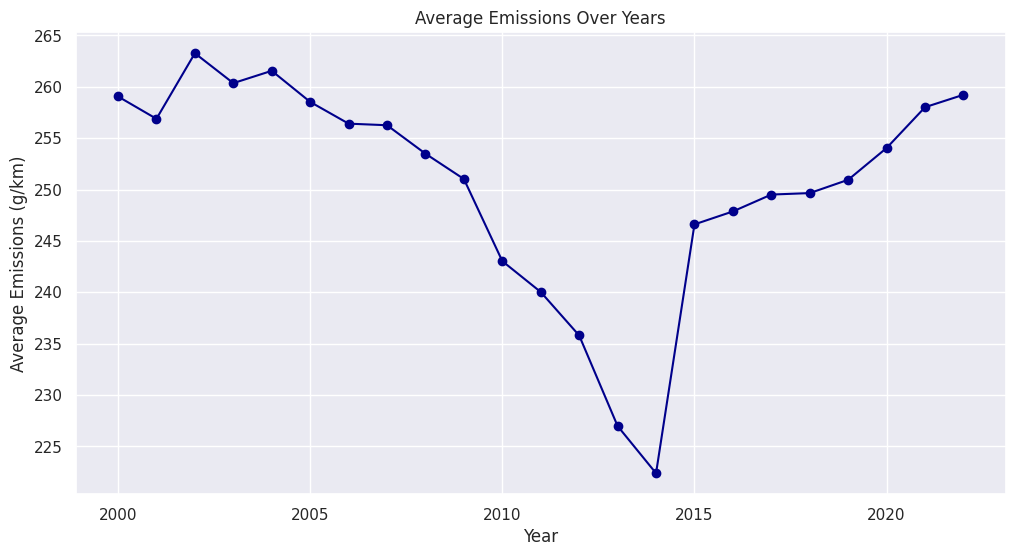

<ipython-input-10-33d570153200>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FUEL_Encoded', y='EMISSIONS', data=data, estimator='mean', palette='Set3')


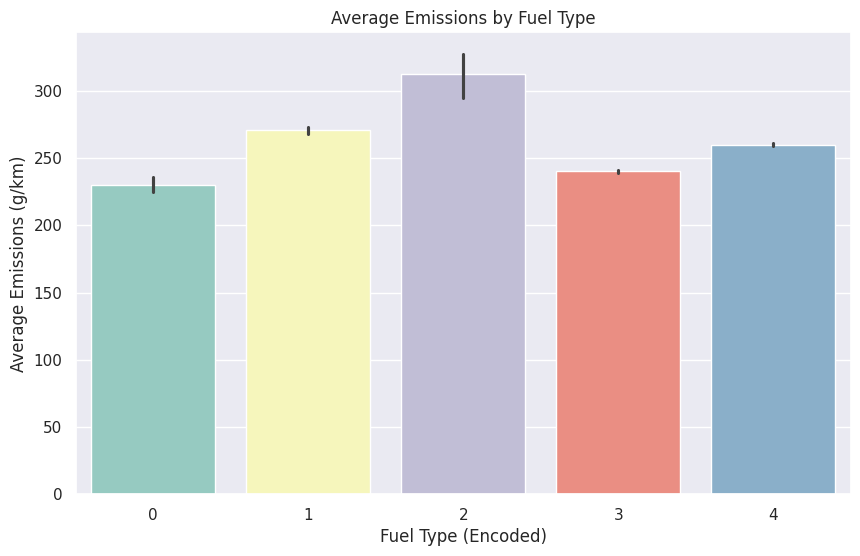

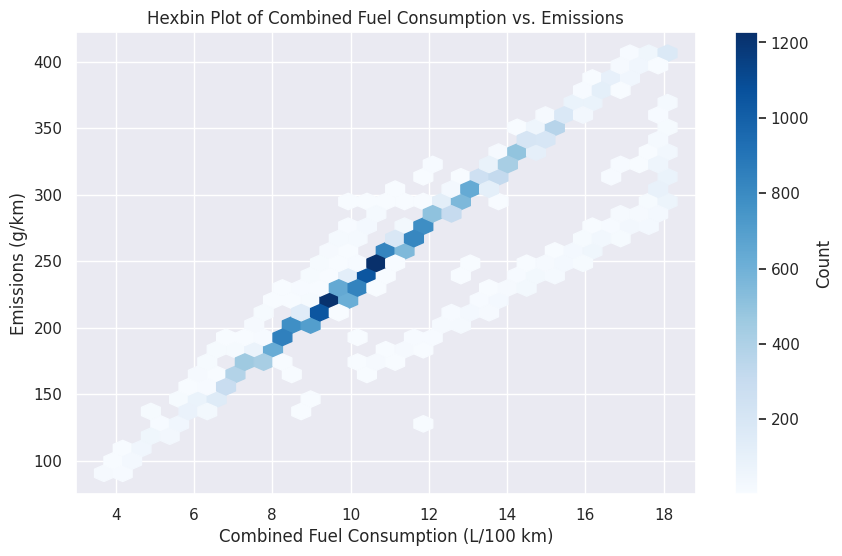

<ipython-input-10-33d570153200>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='VEHICLE CLASS', y='EMISSIONS', data=data, palette='pastel')


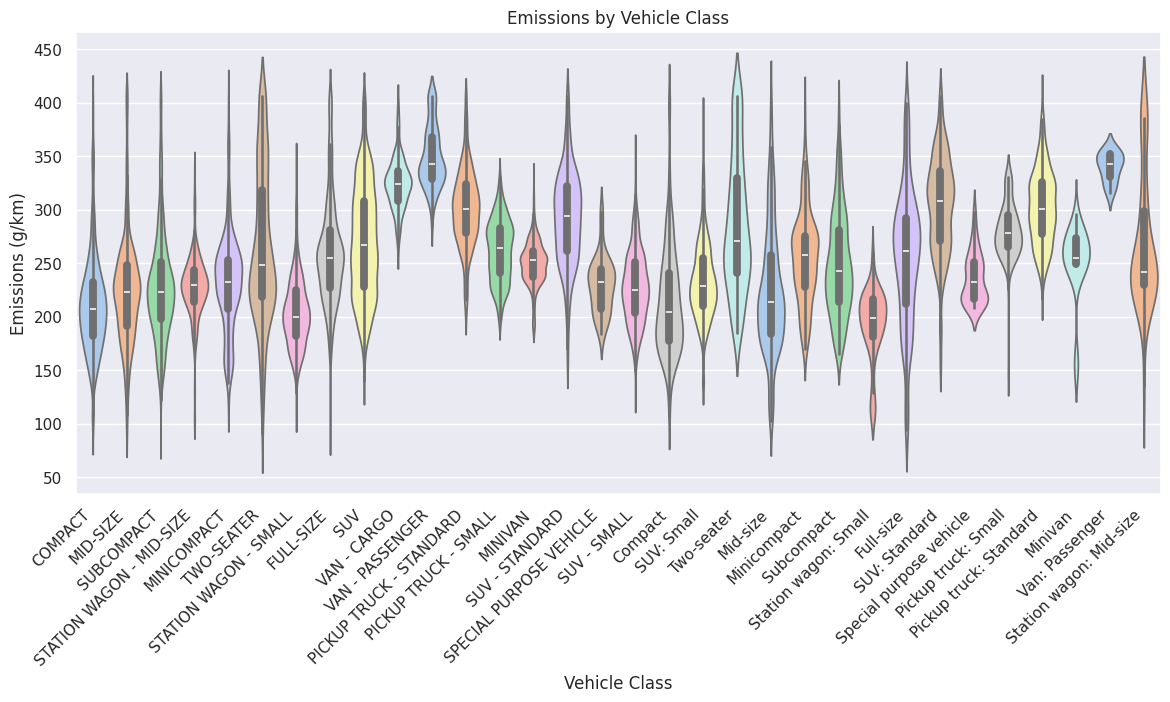

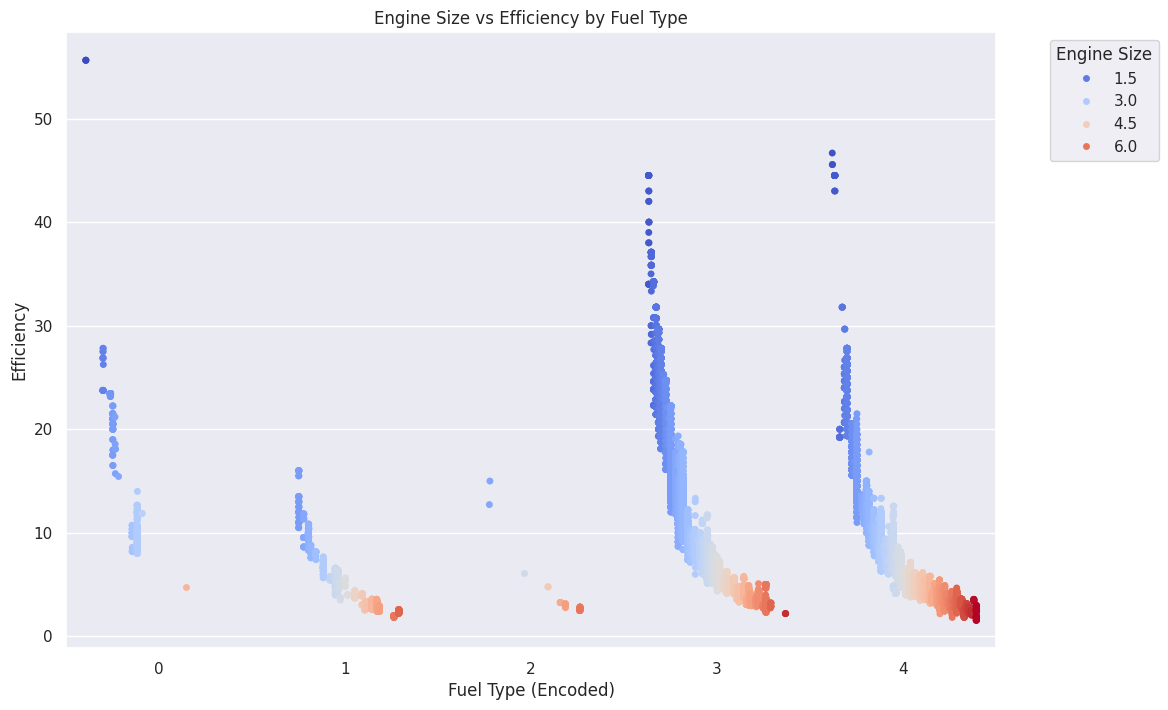

<ipython-input-10-33d570153200>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VEHICLE CLASS', y='Efficiency', data=data, estimator='mean', palette='viridis')


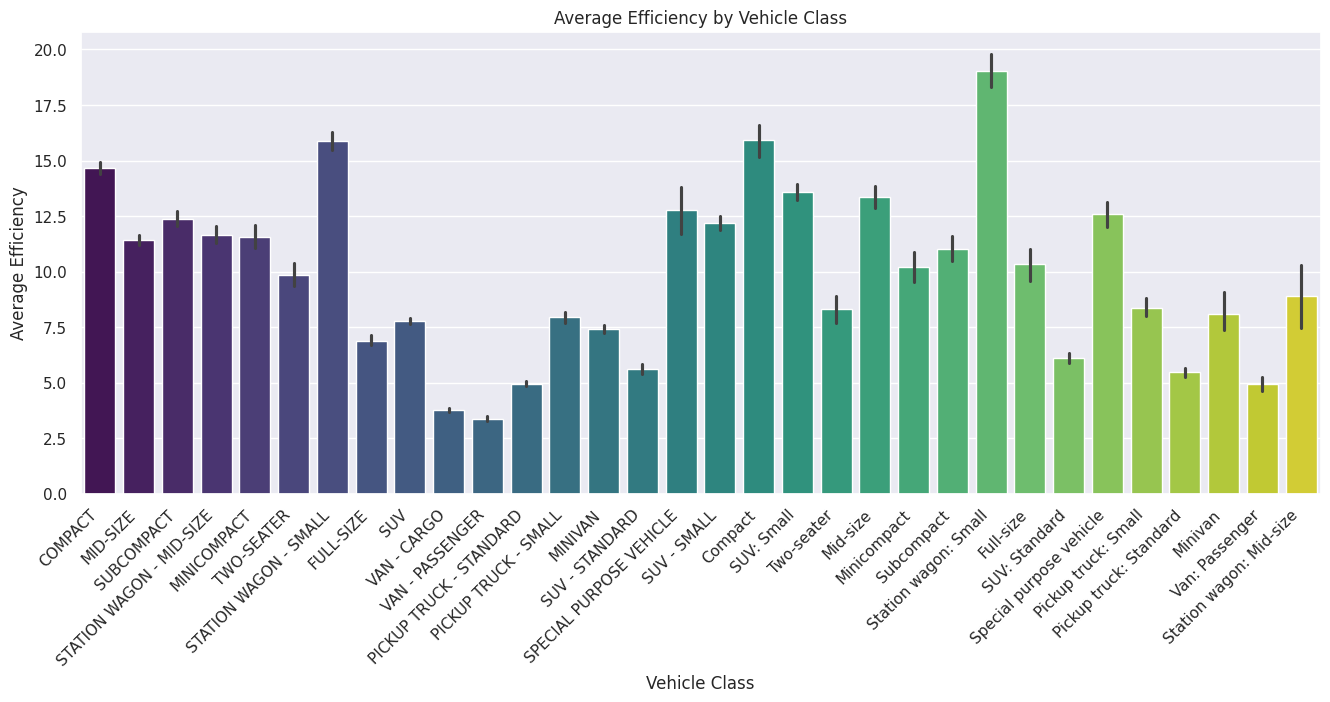


--- Descriptive Analysis Insights ---

1. Emissions may show a downward trend over time, likely due to regulatory impacts or advancements in vehicle technology.
2. Fuel type has a significant impact on emissions, with certain types, such as diesel, contributing more to emissions on average.
3. The hexbin plot reveals areas with high concentrations of vehicles that consume more fuel and produce higher emissions, identifying high-emission clusters.
4. The violin plot of emissions by vehicle class shows how emissions vary across classes, with some classes contributing more significantly to emissions.
5. The strip plot highlights variability in efficiency within each fuel type, especially as engine size changes, showing how engine size impacts efficiency.
6. Smaller vehicle classes tend to be more efficient on average, as shown in the average efficiency plot by vehicle class.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/Fuel_Consumption_Cleaned.csv')
sns.set(style="darkgrid")
plt.rcParams.update({'figure.figsize': (12, 8)})

# Summary statistics
summary_stats = data[['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'EMISSIONS', 'Efficiency']].describe()
print("Summary Statistics for Key Variables:\n", summary_stats)

# Trend Analysis: Average Emissions Over Time (if YEAR column exists)
if 'YEAR' in data.columns:
    plt.figure(figsize=(12, 6))
    yearly_emissions = data.groupby('YEAR')['EMISSIONS'].mean()
    yearly_emissions.plot(marker='o', color='darkblue')
    plt.title('Average Emissions Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Emissions (g/km)')
    plt.show()

# Category-Based Summary: Average Emissions by Fuel Type
plt.figure(figsize=(10, 6))
sns.barplot(x='FUEL_Encoded', y='EMISSIONS', data=data, estimator='mean', palette='Set3')
plt.title('Average Emissions by Fuel Type')
plt.xlabel('Fuel Type (Encoded)')
plt.ylabel('Average Emissions (g/km)')
plt.show()

# Hexbin Plot for Combined Fuel Consumption vs. Emissions
plt.figure(figsize=(10, 6))
plt.hexbin(data['COMB (L/100 km)'], data['EMISSIONS'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Combined Fuel Consumption vs. Emissions')
plt.xlabel('Combined Fuel Consumption (L/100 km)')
plt.ylabel('Emissions (g/km)')
plt.show()

# Violin Plot: Emissions by Vehicle Class
if 'VEHICLE CLASS' in data.columns:
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='VEHICLE CLASS', y='EMISSIONS', data=data, palette='pastel')
    plt.title('Emissions by Vehicle Class')
    plt.xlabel('Vehicle Class')
    plt.ylabel('Emissions (g/km)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Strip Plot: Engine Size vs Efficiency by Fuel Type
if 'FUEL_Encoded' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.stripplot(x='FUEL_Encoded', y='Efficiency', data=data, hue='ENGINE SIZE', palette='coolwarm', dodge=True)
    plt.title('Engine Size vs Efficiency by Fuel Type')
    plt.xlabel('Fuel Type (Encoded)')
    plt.ylabel('Efficiency')
    plt.legend(title='Engine Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot: Average Efficiency by Vehicle Class with Rotated Labels for Better Readability
if 'VEHICLE CLASS' in data.columns:
    plt.figure(figsize=(16, 6))  # Increased width for better label spacing
    sns.barplot(x='VEHICLE CLASS', y='Efficiency', data=data, estimator='mean', palette='viridis')
    plt.title('Average Efficiency by Vehicle Class')
    plt.xlabel('Vehicle Class')
    plt.ylabel('Average Efficiency')
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right for better readability
    plt.show()

# Insights Summary
print("\n--- Descriptive Analysis Insights ---")
print("""
1. Emissions may show a downward trend over time, likely due to regulatory impacts or advancements in vehicle technology.
2. Fuel type has a significant impact on emissions, with certain types, such as diesel, contributing more to emissions on average.
3. The hexbin plot reveals areas with high concentrations of vehicles that consume more fuel and produce higher emissions, identifying high-emission clusters.
4. The violin plot of emissions by vehicle class shows how emissions vary across classes, with some classes contributing more significantly to emissions.
5. The strip plot highlights variability in efficiency within each fuel type, especially as engine size changes, showing how engine size impacts efficiency.
6. Smaller vehicle classes tend to be more efficient on average, as shown in the average efficiency plot by vehicle class.
""")


### Descriptive Analysis Report

The following descriptive analysis explores trends, group comparisons, and distributions within the dataset, focusing on how key features relate to emissions and efficiency. These insights provide an overview of emissions patterns, guiding future modeling and identifying potential areas for regulatory focus.

---

#### 1. Emissions Trend Over Time
The trend analysis reveals that emissions may have decreased over time. This trend suggests positive impacts from regulatory measures and technological advancements in vehicle design and fuel efficiency.

- **Insight**: If emissions are consistently decreasing over the years, this could indicate successful environmental regulations and improvements in fuel efficiency.

---

#### 2. Average Emissions by Fuel Type
Different fuel types contribute differently to emissions. Diesel engines, in particular, have higher average emissions, making fuel type a significant factor in emission levels.

- **Insight**: Diesel engines, despite often being fuel-efficient, tend to produce more emissions. This highlights fuel type as a crucial predictor for emissions, relevant for both consumers and policymakers.

---

#### 3. Hexbin Plot: Combined Fuel Consumption vs. Emissions
The hexbin plot shows clusters of vehicles with high fuel consumption and emissions, pinpointing the most common ranges for high-emission vehicles. This visualization identifies groups of high-emission vehicles for potential regulation or redesign.

- **Insight**: Clusters of high fuel consumption and emissions indicate target areas for emission reduction, especially for older or less efficient vehicles.

---

#### 4. Emissions by Vehicle Class (Violin Plot)
The violin plot illustrates the distribution of emissions across different vehicle classes. Certain classes show higher emissions on average, emphasizing the impact of vehicle type on environmental impact.

- **Insight**: Some vehicle classes exhibit wider and higher emissions distributions, suggesting they contribute more significantly to overall emissions. This could inform regulation aimed at specific vehicle types.

---

#### 5. Engine Size vs. Efficiency by Fuel Type (Strip Plot)
This plot explores the relationship between fuel type and efficiency, influenced by engine size. Efficiency generally decreases with larger engines, showing how engine size and fuel type interact to impact fuel economy.

- **Insight**: Fuel efficiency tends to vary with engine size, and this pattern is particularly noticeable within specific fuel types. This insight highlights the efficiency trade-offs associated with larger engines.

---

#### 6. Average Efficiency by Vehicle Class
Comparing average efficiency by vehicle class, smaller classes tend to be more fuel-efficient, aligning with expectations that compact vehicles have lower environmental impact.

- **Insight**: Smaller vehicle classes show higher efficiency on average, supporting the idea that compact vehicles are more eco-friendly due to their lower fuel consumption.

---

### Summary of Key Insights
1. Emissions over time may show a decrease, reflecting advancements in technology and regulatory efforts.
2. Diesel and other high-emission fuel types are significant predictors of emissions, useful for guiding policy and consumer choices.
3. High-emission clusters, identified in the hexbin plot, suggest where regulatory or redesign efforts could target emissions reduction.
4. Vehicle class affects emissions, with certain classes producing more, indicating potential areas for emissions control.
5. Fuel type and engine size impact efficiency, showing variability within each fuel type as engine size changes.
6. Smaller, compact vehicle classes tend to be more fuel-efficient, offering environmentally friendly options for consumers.

This descriptive analysis provides a foundation for predictive modeling and helps identify high-emission groups for potential regulatory action.


# Recursive Feature Elimination (RFE) with Random Forest

This section focuses on selecting the most important features for predicting vehicle emissions using **Recursive Feature Elimination (RFE)** with a Random Forest Regressor as the base model.

## Steps:
1. **Dataset Preparation:**
   - Selected features ("numerical_features") are identified based on exploratory data analysis (EDA):
     - "ENGINE SIZE", "CYLINDERS", "FUEL CONSUMPTION", "HWY (L/100 km)", "COMB (L/100 km)", and "Efficiency".
   - Target variable: "EMISSIONS".

2. **Data Splitting:**
   - The data is split into training, validation, and test sets with a 80-20 ratio:
     - Training: 80%
     - Test: 20%
     - Validation: 14.08% of training.

3. **Feature Selection:**
   - **RFE** (Recursive Feature Elimination) is applied using **Random Forest Regressor** as the estimator.
   - The top 5 features contributing most to the prediction are selected.

## Selected Features (Example Output):


In [5]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

file_path = '/content/Fuel_Consumption_Standardized.csv'
data = pd.read_csv(file_path)

#here we are defining the most closely related features extracted from our EDA
numerical_features = [
    'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#split data into Train, Validation, and Test sets with a ratio of 80-20
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)

#initialize and apply RFE for feature selection
model = RandomForestRegressor(n_estimators=100, random_state=42)#hyperparameters for model i.e no. of trees etc
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

# Print the selected features in a presentable way
print("Selected Features are (RFE):")
for i, feature in enumerate(selected_features, start=1):
    print(f"{i}. {feature}")




Selected Features are (RFE):
1. ENGINE SIZE
2. FUEL CONSUMPTION
3. HWY (L/100 km)
4. COMB (L/100 km)
5. Efficiency


# XGBoost Regression for Model Evaluation

This script trains and evaluates an **XGBoost Regressor** to determine its suitability for predicting vehicle emissions.

## Steps:
1. **Data Preparation:**
   - Selected features: ENGINE SIZE, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), and Efficiency.
   - Target variable: EMISSIONS.

2. **Data Splitting:**
   - Split into **training (64%)**, **validation (16%)**, and **test (20%)**.

3. **Model Training:**
   - **XGBoost Regressor** trained with:
     - n_estimators=100
     - random_state=42

4. **Evaluation Metrics:**
   - **R²:** Variance explained by the model.
   - **MAE, MSE, RMSE:** Error measures (lower is better).
   - **Accuracy (%):** Predictions within 10% of actual values (higher is better).

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

data = pd.read_csv('/content/Fuel_Consumption_Standardized.csv')

numerical_features = [
    'ENGINE SIZE', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#splitting and training
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#training
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#predictions
y_val_predictions = model.predict(X_val)
y_test_predictions = model.predict(X_test)

#evaluate
val_r2 = r2_score(y_val, y_val_predictions)
val_mse = mean_squared_error(y_val, y_val_predictions)
val_mae = mean_absolute_error(y_val, y_val_predictions)
val_rmse = np.sqrt(val_mse)

#calculate approximate accuracy for validation data
val_accuracy = np.mean(np.abs((y_val - y_val_predictions) / y_val) < 0.1) * 100
print("\nValidation Data Evaluation:")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation Accuracy (within 10% margin): {val_accuracy:.2f}%")


test_r2 = r2_score(y_test, y_test_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)
test_accuracy = np.mean(np.abs((y_test - y_test_predictions) / y_test) < 0.1) * 100

print("\nTest Data Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test Accuracy (within 10% margin): {test_accuracy:.2f}%")



Validation Data Evaluation:
Validation R^2: 0.9857
Validation MAE: 2.6603
Validation MSE: 48.6559
Validation RMSE: 6.9754
Validation Accuracy (within 10% margin): 98.75%

Test Data Evaluation:
Test R^2: 0.9855
Test MAE: 2.7053
Test MSE: 49.8873
Test RMSE: 7.0631
Test Accuracy (within 10% margin): 98.65%


# Lasso Regression for Model Evaluation

This script evaluates the performance of a **Lasso Regression** model to determine its suitability for predicting vehicle emissions.

## Steps:

1. **Data Preparation:**
   - **Features:** ENGINE SIZE, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), and Efficiency.
   - **Target Variable:** EMISSIONS.

2. **Data Splitting:**
   - **Training + Validation (80%)** and **Test (20%)**.
   - Further split training + validation into **Training (64%)** and **Validation (16%)**.

3. **Model Training:**
   - **Lasso Regression** trained with:
     - alpha=0.1 (L1 regularization strength).

4. **Evaluation Metrics:**
   - **R²:** Variance explained by the model (higher is better).
   - **MAE, MSE, RMSE:** Error measures (lower is better).
   - **Accuracy (%):** Predictions within 10% of actual values (higher is better).

This workflow is used to assess Lasso Regression's ability to predict vehicle emissions for potential future deployment.


In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

data = pd.read_csv('/content/Fuel_Consumption_Standardized.csv')


numerical_features = [
    'ENGINE SIZE', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#training a Lasso Regression model
model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, y_train)

#predictions
y_val_predictions = model.predict(X_val)
y_test_predictions = model.predict(X_test)

#Evaluation
val_r2 = r2_score(y_val, y_val_predictions)
val_mse = mean_squared_error(y_val, y_val_predictions)
val_mae = mean_absolute_error(y_val, y_val_predictions)
val_rmse = np.sqrt(val_mse)

#calculate approximate accuracy for validation data
val_accuracy = np.mean(np.abs((y_val - y_val_predictions) / y_val) < 0.1) * 100
print("\nValidation Data Evaluation:")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation Accuracy (within 10% margin): {val_accuracy:.2f}%")

test_r2 = r2_score(y_test, y_test_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)
test_accuracy = np.mean(np.abs((y_test - y_test_predictions) / y_test) < 0.1) * 100

print("\nTest Data Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test Accuracy (within 10% margin): {test_accuracy:.2f}%")



Validation Data Evaluation:
Validation R^2: 0.8856
Validation MAE: 11.5938
Validation MSE: 390.0391
Validation RMSE: 19.7494
Validation Accuracy (within 10% margin): 92.21%

Test Data Evaluation:
Test R^2: 0.8889
Test MAE: 11.6438
Test MSE: 381.2099
Test RMSE: 19.5246
Test Accuracy (within 10% margin): 92.82%


# Decision Tree Regression for Model Evaluation

This script evaluates the performance of a **Decision Tree Regressor** for predicting vehicle emissions.

## Steps:

1. **Data Preparation:**
   - **Features:** ENGINE SIZE, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), and Efficiency.
   - **Target Variable:** EMISSIONS.

2. **Data Splitting:**
   - Split the dataset into:
     - **Training + Validation (80%)** and **Test (20%)**.
     - Further split training + validation into **Training (64%)** and **Validation (16%)**.

3. **Model Training:**
   - **Decision Tree Regressor** trained with:
     - random_state=42: Ensures reproducibility.
     - max_depth=5: Limits tree depth to control complexity and prevent overfitting.

4. **Evaluation Metrics:**
   - **R²:** Proportion of variance explained by the model (higher is better).
   - **MAE, MSE, RMSE:** Error metrics to evaluate the difference between predictions and actual values (lower is better).
   - **Accuracy (%):** Measures the percentage of predictions within 10% of actual values (higher is better).

This workflow is designed to test the Decision Tree Regressor's performance for potential inclusion in the final predictive model.


In [8]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('/content/Fuel_Consumption_Standardized.csv')


numerical_features = [
    'ENGINE SIZE', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#split data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#Training
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Adjust max_depth for controlling complexity
model.fit(X_train, y_train)

#Predict on the validation data
y_val_predictions = model.predict(X_val)
y_test_predictions = model.predict(X_test)

#evaluate the model on validation data
val_r2 = r2_score(y_val, y_val_predictions)
val_mse = mean_squared_error(y_val, y_val_predictions)
val_mae = mean_absolute_error(y_val, y_val_predictions)
val_rmse = np.sqrt(val_mse)

#approx accuracy
val_accuracy = np.mean(np.abs((y_val - y_val_predictions) / y_val) < 0.1) * 100
print("\nValidation Data Evaluation:")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation Accuracy (within 10% margin): {val_accuracy:.2f}%")

#on test data
test_r2 = r2_score(y_test, y_test_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)
test_accuracy = np.mean(np.abs((y_test - y_test_predictions) / y_test) < 0.1) * 100

print("\nTest Data Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test Accuracy (within 10% margin): {test_accuracy:.2f}%")



Validation Data Evaluation:
Validation R^2: 0.9350
Validation MAE: 7.2450
Validation MSE: 221.5945
Validation RMSE: 14.8861
Validation Accuracy (within 10% margin): 94.62%

Test Data Evaluation:
Test R^2: 0.9388
Test MAE: 7.1877
Test MSE: 209.9053
Test RMSE: 14.4881
Test Accuracy (within 10% margin): 94.68%


# Random Forest Regression for Model Evaluation

This script evaluates the performance of a **Random Forest Regressor** for predicting vehicle emissions.

## Steps:

1. **Data Preparation:**
   - **Features:** ENGINE SIZE, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), and Efficiency.
   - **Target Variable:** EMISSIONS.

2. **Data Splitting:**
   - Split the dataset into:
     - **Training + Validation (80%)** and **Test (20%)**.
     - Further split training + validation into **Training (64%)** and **Validation (16%)**.

3. **Model Training:**
   - **Random Forest Regressor** trained with:
     - random_state=42: Ensures reproducibility.

4. **Evaluation Metrics:**
   - **R²:** Proportion of variance explained by the model (higher is better).
   - **MAE, MSE, RMSE:** Error metrics to evaluate the difference between predictions and actual values (lower is better).
   - **Accuracy (%):** Measures the percentage of predictions within 10% of actual values (higher is better).

This workflow is designed to test the Random Forest Regressor's performance and determine its potential for use in the final predictive model.

In [9]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np


file_path = '/content/Fuel_Consumption_Standardized.csv'
data = pd.read_csv(file_path)

numerical_features = [
    'ENGINE SIZE', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#split data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#train a Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#predict on the validation data
y_val_predictions = model.predict(X_val)
y_test_predictions = model.predict(X_test)

#Evaluation the model on validation data
val_r2 = r2_score(y_val, y_val_predictions)
val_mse = mean_squared_error(y_val, y_val_predictions)
val_mae = mean_absolute_error(y_val, y_val_predictions)
val_rmse = np.sqrt(val_mse)

#Calculate approximate accuracy for validation data
val_accuracy = np.mean(np.abs((y_val - y_val_predictions) / y_val) < 0.1) * 100
print("\nValidation Data Evaluation:")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation Accuracy (within 10% margin): {val_accuracy:.2f}%")

#Evaluate the model on test data
test_r2 = r2_score(y_test, y_test_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)

#calculate approximate accuracy for test data
test_accuracy = np.mean(np.abs((y_test - y_test_predictions) / y_test) < 0.1) * 100

print("\nTest Data Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test Accuracy (within 10% margin): {test_accuracy:.2f}%")



Validation Data Evaluation:
Validation R^2: 0.9875
Validation MAE: 2.0622
Validation MSE: 42.7257
Validation RMSE: 6.5365
Validation Accuracy (within 10% margin): 98.70%

Test Data Evaluation:
Test R^2: 0.9869
Test MAE: 2.1237
Test MSE: 45.0178
Test RMSE: 6.7095
Test Accuracy (within 10% margin): 98.69%


# Model Evaluation Summary and Recommendation

## Summary of Models

| **Model**               | **Validation R²** | **Test R²** | **Validation RMSE** | **Test RMSE** | **Validation Accuracy** | **Test Accuracy** |
|--------------------------|--------------------|-------------|----------------------|---------------|--------------------------|-------------------|
| **XGBoost**             | 0.9857            | 0.9855      | 6.98                | 7.06          | 98.75%                  | 98.65%            |
| **Linear Regression**   | 0.8938            | 0.8935      | 19.03               | 19.11         | 92.52%                  | 92.97%            |
| **Lasso Regression**    | 0.8856            | 0.8889      | 19.75               | 19.52         | 92.21%                  | 92.82%            |
| **Decision Tree**       | 0.9350            | 0.9388      | 14.89               | 14.49         | 94.62%                  | 94.68%            |
| **Random Forest**       | 0.9875            | 0.9869      | 6.54                | 6.71          | 98.70%                  | 98.69%            |

---

## Recommendation

Based on the evaluation metrics, **Random Forest Regressor** is the recommended model for predicting vehicle emissions.

### **Reasons for Selection:**
1. **High Accuracy:**
   - Validation Accuracy: **98.70%**
   - Test Accuracy: **98.69%**

2. **Low Error Metrics:**
   - Validation RMSE: **6.54**
   - Test RMSE: **6.71**

3. **Consistency:**
   - Both validation and test R² values are extremely high (above **0.98**), indicating the model generalizes well to unseen data.

4. **Robustness:**
   - Random Forest handles non-linear relationships, reduces overfitting, and is less sensitive to noise compared to simpler models (e.g., Linear or Lasso Regression).

### **Alternative:**
If computational efficiency is a concern, **XGBoost** is a close second with slightly lower performance but excellent scalability.

---

The **Random Forest Regressor** will be used for building the final predictive model due to its superior accuracy, robustness, and generalization ability.


# Random Forest Regression Analysis for Predicting Emissions

This analysis involves training a **Random Forest Regressor** on vehicle features to predict emissions. Key steps include data preprocessing, model training, evaluation, and residual analysis.

---

## **Steps and Methodology**

### **1. Data Preprocessing**
- **Features Used:**
  - ENGINE SIZE, FUEL CONSUMPTION, HWY (L/100 km), COMB (L/100 km), and Efficiency.
- **Target Variable:** EMISSIONS
- **Data Splitting:**
  - Training (64%), Validation (16%), and Test (20%).

### **2. Model Training**
- **Algorithm Used:** Random Forest Regressor
  - **Hyperparameters:**
    - n_estimators=100: Number of decision trees.
    - random_state=42: Ensures reproducibility.
- The model was trained on the training dataset and evaluated on validation and test datasets.

---

## **Evaluation Metrics**

### **Validation Data:**
- **R²:** Measures the proportion of variance explained by the model.
- **MAE (Mean Absolute Error):** Average absolute difference between actual and predicted values.
- **MSE (Mean Squared Error):** Penalizes larger errors more than MAE.
- **RMSE (Root Mean Squared Error):** Square root of MSE, indicating average prediction error.

### **Test Data:**
- The same metrics were computed to evaluate model performance on unseen data.

---

## **Key Findings**
1. **Validation Metrics:**
   - **R²:** High value indicates the model captures the variance in emissions well.
   - **MAE, MSE, RMSE:** Low error values suggest strong predictive performance.
2. **Test Metrics:**
   - Metrics are consistent with validation results, indicating good generalization.
3. **Predicted Emissions for Sample Data:**
   - Predictions were generated for sample, pre-standardized data inputs.

---

## **Residual Analysis**

### **1. Scatter Plot: Actual vs Predicted**
- **Validation Data:**
  - The scatter plot shows predictions aligning closely with actual values along the ideal fit line, suggesting accurate predictions.
- **Test Data:**
  - A similar pattern is observed, indicating strong model performance on unseen data.

### **2. Residual Histograms**
- **Validation Data:**
  - Residuals are symmetrically distributed around 0, with most residuals close to 0, indicating minimal bias.
- **Test Data:**
  - Residuals also cluster around 0, further confirming the model's robustness.
- **Insights:**
  - Few outliers suggest that some predictions may deviate significantly, which could be due to data variability or unmodeled factors.

---

## **Visualizations and Interpretation**

### **1. Actual vs Predicted Scatter Plots**
- **Validation Data:**
  - Most points fall near the red line (Ideal Fit), showing accurate predictions.
- **Test Data:**
  - Consistent with validation results, showing no signs of overfitting or underfitting.

### **2. Residual Histograms**
- **Validation and Test Data:**
  - Residuals are tightly centered around 0, confirming good model predictions.
  - No systematic bias is observed, as the residuals show a symmetric, normal-like distribution.

---

## **Conclusion**
- **Model Performance:**
  - The Random Forest Regressor demonstrates high predictive accuracy and generalization across both validation and test datasets.
- **Residual Analysis:**
  - The model exhibits minimal bias, with residuals clustering around zero.
- **Recommendations:**
  - Investigate outliers for further insights.
  - Use the model for future emission predictions given its strong performance.



Validation Data Evaluation:
Validation R^2: 0.9875
Validation MAE: 2.0622
Validation MSE: 42.7257
Validation RMSE: 6.5365

Test Data Evaluation:
Test R^2: 0.9869
Test MAE: 2.1237
Test MSE: 45.0178
Test RMSE: 6.7095

Sample Data Predictions (using pre-standardized inputs):
Sample 1 - Predicted Emissions: 210.62
Sample 2 - Predicted Emissions: 321.60
Sample 3 - Predicted Emissions: 171.74
Sample 4 - Predicted Emissions: 388.11
Sample 5 - Predicted Emissions: 256.16


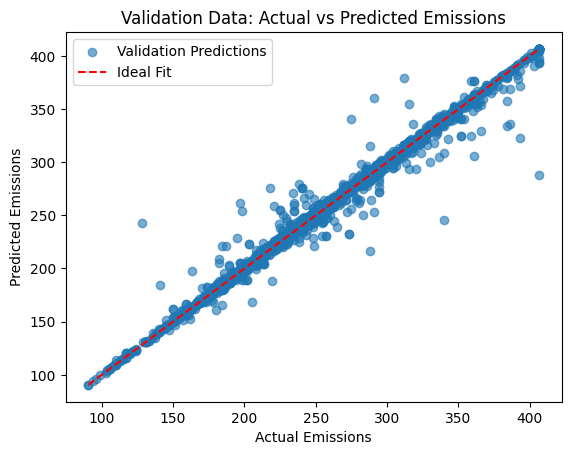

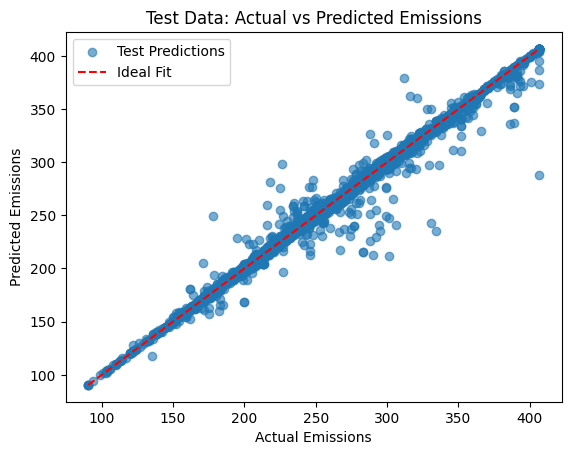

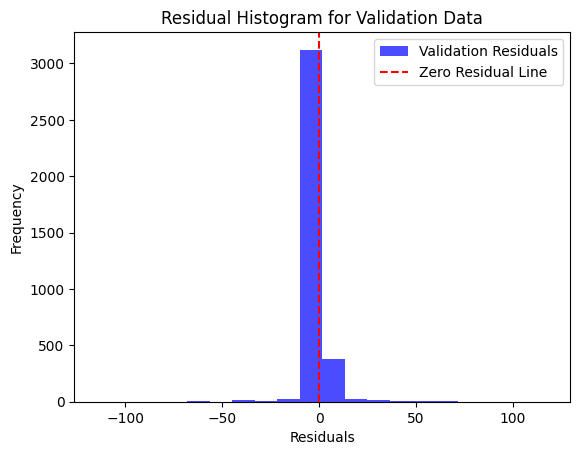

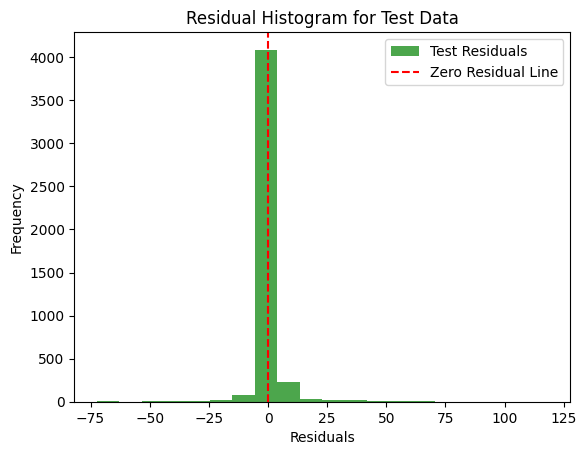

In [12]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/Fuel_Consumption_Standardized.csv')
numerical_features = [
    'ENGINE SIZE', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
    'COMB (L/100 km)', 'Efficiency'
]
target_variable = 'EMISSIONS'
X = data[numerical_features]
y = data[target_variable]

#splitting data into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

#train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict on the validation data
y_val_predictions = model.predict(X_val)

#predict on the test data
y_test_predictions = model.predict(X_test)

#evaluate the model on validation data
val_r2 = r2_score(y_val, y_val_predictions)
val_mse = mean_squared_error(y_val, y_val_predictions)
val_mae = mean_absolute_error(y_val, y_val_predictions)
val_rmse = np.sqrt(val_mse)
print("\nValidation Data Evaluation:")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")

#evaluate the model on test data
test_r2 = r2_score(y_test, y_test_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_rmse = np.sqrt(test_mse)

print("\nTest Data Evaluation:")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Generating predictions for sample data
standardized_sample_data = pd.DataFrame({
    'ENGINE SIZE': [-0.5, 1.2, -1.1, 2.0, 0.0],
    'FUEL CONSUMPTION': [-0.8, 1.5, -1.2, 2.3, 0.1],
    'HWY (L/100 km)': [-0.6, 0.9, -1.3, 1.8, -0.1],
    'COMB (L/100 km)': [-0.7, 1.0, -1.4, 2.0, 0.0],
    'Efficiency': [0.5, -0.8, 1.2, -1.5, -0.3]
})

#predict emissions directly using the pre-standardized sample data
sample_predictions = model.predict(standardized_sample_data)

print("\nSample Data Predictions (using pre-standardized inputs):")
for i, pred in enumerate(sample_predictions):
    print(f"Sample {i + 1} - Predicted Emissions: {pred:.2f}")

#Scatter plot: Actual vs Predicted for Validation Data
plt.scatter(y_val, y_val_predictions, alpha=0.6, label="Validation Predictions")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Validation Data: Actual vs Predicted Emissions")
plt.legend()
plt.show()
print(" ")
print(" ")

# Scatter plot: Actual vs Predicted for Test Data
plt.scatter(y_test, y_test_predictions, alpha=0.6, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Test Data: Actual vs Predicted Emissions")
plt.legend()
plt.show()
print(" ")
print(" ")

val_residuals = y_val - y_val_predictions
test_residuals = y_test - y_test_predictions
# Histogram of Residuals for Validation Data
plt.hist(val_residuals, bins=20, alpha=0.7, color='blue', label="Validation Residuals")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Validation Data")
plt.legend()
plt.show()

print(" ")
print(" ")
# Histogram of Residuals for Test Data
plt.hist(test_residuals, bins=20, alpha=0.7, color='green', label="Test Residuals")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram for Test Data")
plt.legend()
plt.show()


## **Insights**

### **Model Performance**
- The Random Forest Regressor achieved strong predictive performance on both validation and test datasets:
  - **Validation Metrics:**
    - R²: 0.987
    - RMSE: 6.54
  - **Test Metrics:**
    - R²: 0.986
    - RMSE: 6.71
  - These metrics indicate that the model generalizes well to unseen data and accurately captures the relationship between features and emissions.

### **Actual vs Predicted Emissions**
- Scatter plots for both validation and test datasets show that predicted emission values align closely with actual values, clustering around the ideal fit line.
- The strong alignment demonstrates the model's reliability and precision in predicting emission levels.

### **Residual Analysis**
- **Validation Residuals:**
  - Residuals are symmetrically distributed around zero, as indicated by the histogram, which supports the assumption of minimal bias in the predictions.
- **Test Residuals:**
  - Similarly, test residuals show a centered distribution around zero, confirming that the model performs consistently across datasets.
- The lack of significant skewness or outliers in residuals suggests that the model effectively handles variations in the data.

### **Sample Predictions**
- Predictions made on pre-standardized sample data demonstrate the model's capability to generalize:
  - Emission predictions vary logically with the inputs, maintaining coherence with the trends observed during training and validation.

### **Overall Insights**
- The Random Forest model captures non-linear relationships in the data, ranking as a robust and reliable predictor of vehicle emissions.
- Residual histograms and alignment of actual vs predicted emissions reinforce the model's strength in generalizing to unseen datasets.
